In [1]:
# Basic library
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

# Sklearn library
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, 
                             confusion_matrix,
                            plot_confusion_matrix,
                            precision_recall_curve,
                            roc_curve)
from sklearn.preprocessing import StandardScaler

# PLotting library
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import seaborn as sns
plt.style.use('ggplot')

# Keras library
import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

Using TensorFlow backend.


In [2]:
# Laod the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Inspect the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Inspect summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [5]:
# Scale the non-processed features
scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])

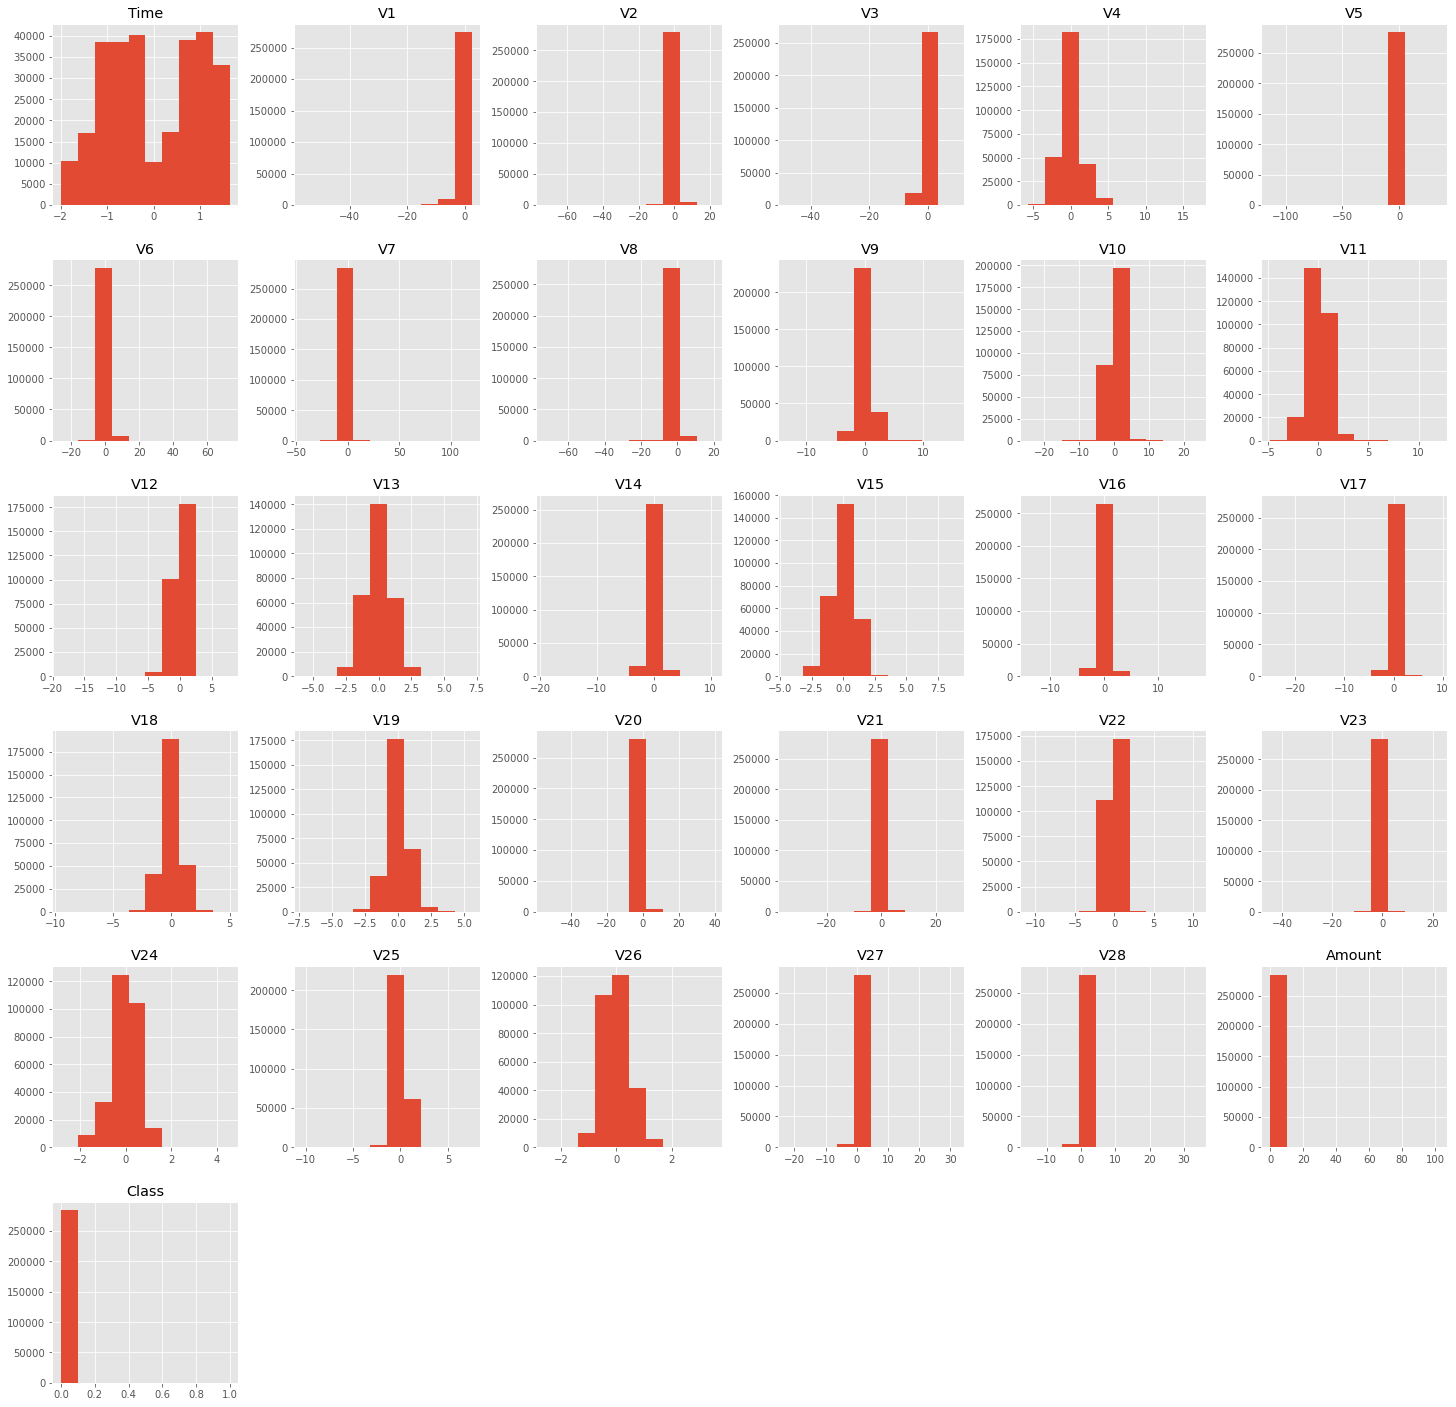

In [6]:
# Visualize the scaled data
df.hist(figsize=(25, 25));

In [7]:
# Create the corr plot
# sns.pairplot(df, kind='reg')
# sns.plt.show()

In [8]:
# Select target and independent variables
X = df.drop(columns='Class')
y = df['Class']

# Spliting up the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# Shape of the data
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (199364, 30)
y_train: (199364,)
X_test: (85443, 30)
y_test: (85443,)


In [9]:
# Count the occurrences of fraud and no fraud and print them
fraud = (y_train==1).sum()
valid = (y_train==0).sum()
print('No. of fraud cases:', fraud)
print('No. of valid cases:', valid)

No. of fraud cases: 356
No. of valid cases: 199008


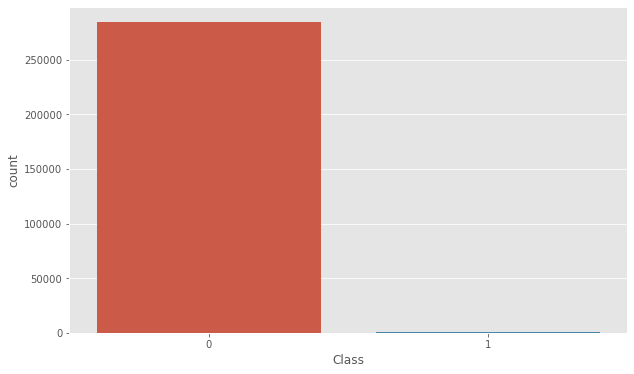

In [10]:
# Plot to check imbalanceness
sns.countplot(x='Class', data=df);

In [11]:
# Define the resampling method
sm = SMOTE(random_state=42)

In [12]:
# Create the resampled feature set
X_res, y_res = sm.fit_resample(X_train, y_train)

In [13]:
# Print the value_counts on the original labels y
pd.value_counts(pd.Series(y_train))

0    199008
1       356
Name: Class, dtype: int64

In [14]:
# Print the value_counts after resampling
pd.value_counts(pd.Series(y_res))

1    199008
0    199008
Name: Class, dtype: int64

# Building Model

In [15]:
# Set parameters
epoch=20
input_shape = X_train.shape[1]
lr=0.0001
batchsize=64

In [16]:
# Define the model
model = Sequential()
model.add(Dense(64, input_shape=(input_shape, ), activation='relu'))
model.add(Dropout(0.3, seed = 0))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3, seed = 0))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1984      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(X_res, y_res, 
                    batch_size=batchsize, 
                    epochs=epoch, 
                    validation_split=0.2, 
                    shuffle=True)

Train on 318412 samples, validate on 79604 samples
Epoch 1/20
318412/318412 [==============================] - 6s 19us/step - loss: 0.0550 - accuracy: 0.9801 - val_loss: 0.0100 - val_accuracy: 0.9999
Epoch 2/20
318412/318412 [==============================] - 6s 19us/step - loss: 0.0136 - accuracy: 0.9963 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 3/20
318412/318412 [==============================] - 6s 19us/step - loss: 0.0087 - accuracy: 0.9978 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4/20
318412/318412 [==============================] - 6s 18us/step - loss: 0.0073 - accuracy: 0.9983 - val_loss: 0.0048 - val_accuracy: 0.9994
Epoch 5/20
318412/318412 [==============================] - 6s 17us/step - loss: 0.0065 - accuracy: 0.9984 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/20
318412/318412 [==============================] - 7s 21us/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.0014 - val_accuracy: 0.9998
Epoch 7/20
318412/318412 [=============================

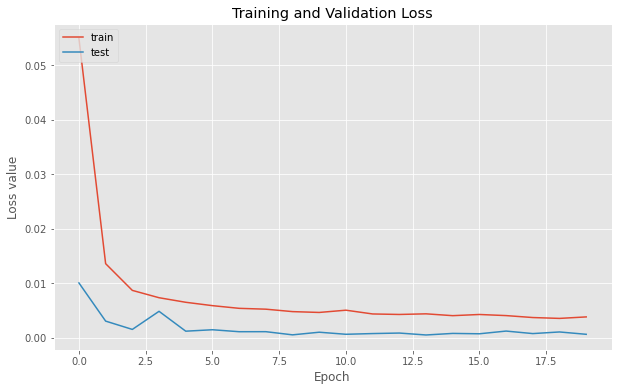

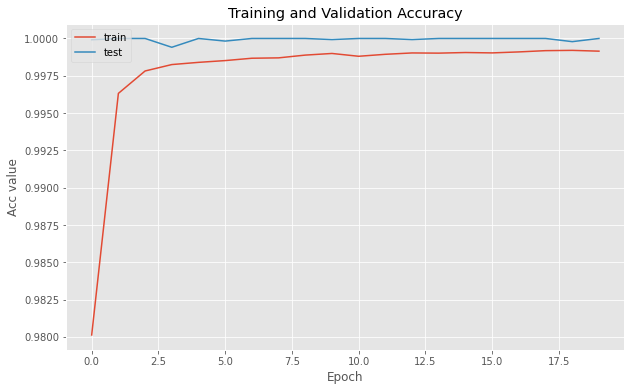

In [19]:
#  Model Evaluation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# Get the confusion matrix
y_pred = model.predict_classes(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix
# sns.heatmap(cf_matrix, annot=True)
# print(classification_report(y_test, y_pred))

array([[85243,    64],
       [   19,   117]], dtype=int64)

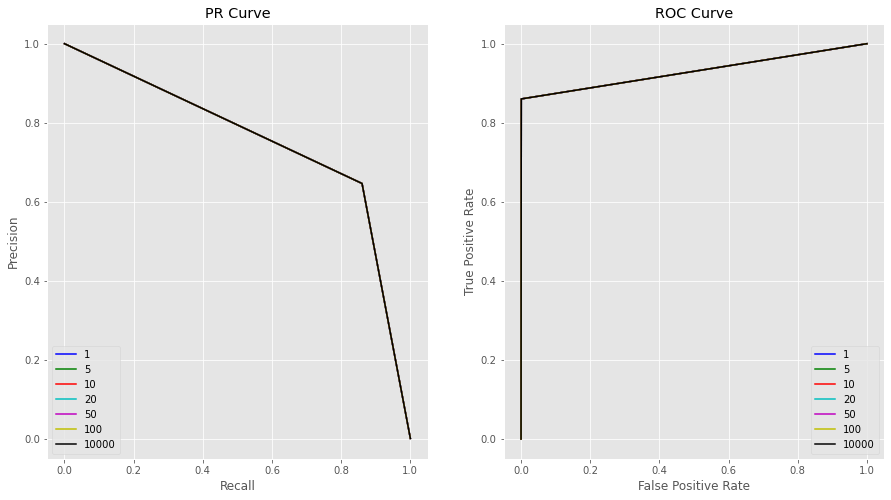

In [21]:
# Plot PR and ROC Cuve
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

for w, k in zip([1, 5, 10, 20, 50, 100, 10000], 'bgrcmykw'):
    p, r,_ = precision_recall_curve(y_test, y_pred)
    tpr, fpr, _ = roc_curve(y_test, y_pred)    
    ax1.plot(r, p, c=k, label=w)
    ax2.plot(tpr, fpr, c=k, label=w)
ax1.legend(loc='lower left')    
ax2.legend(loc='lower right')
plt.show()

In [22]:
# Save the model
model.save('fraud_detection.h5')